# CVE

**Common Vulnerabilities and Exposures Identifier (CVE ID)** is a unique, alphanumeric identifier assigned by the CVE Program. Each identifier references a specific vulnerability. A CVE ID enables automation and multiple parties to discuss, share, and correlate information about a specific vulnerability, knowing they are referring to the same thing

> source: [www.cve.org](https://www.cve.org/ResourcesSupport/Glossary?activeTerm=glossaryCVEID)



You can see this notebook directly via:
- [GitHub](https://github.com/LimberDuck/limberduck.org/blob/master/docs/notebooks/cve/cve.ipynb)
- [Jupter nbviewer](https://nbviewer.org/github/LimberDuck/limberduck.org/blob/master/docs/notebooks/cve/cve.ipynb)

## CVE data downloading

All CVE IDs are taken from [cve.mitre.org/data/downloads/index.html](https://cve.mitre.org/data/downloads/index.html)

In [1]:
url = 'https://cve.mitre.org/data/downloads/allitems.xml'
file_name = 'allitems.xml'

In [2]:
import requests
import urllib3

urllib3.disable_warnings()

file = requests.get(url, verify=False)
open(file_name, 'wb').write(file.content)

214273942

## CVE data parsing

In [3]:
import pandas as pd 
import xml.etree.ElementTree as et 

tree = et.parse(file_name)
root = tree.getroot()
df_cols = ["number", "year"]
rows = []

for item in root:
    item_name = item.attrib.get("name")
    item_year = item_name[4:8]
    rows.append({"number": item_name, "year": item_year})

df = pd.DataFrame(rows, columns = df_cols)

print(df)

                number  year
0        CVE-1999-0001  1999
1        CVE-1999-0002  1999
2        CVE-1999-0003  1999
3        CVE-1999-0004  1999
4        CVE-1999-0005  1999
...                ...   ...
222333  CVE-2022-21788  2022
222334  CVE-2022-21789  2022
222335  CVE-2022-21790  2022
222336  CVE-2022-21791  2022
222337  CVE-2022-21792  2022

[222338 rows x 2 columns]


In [4]:
df = df.groupby(['year'], as_index=False)[['number']].count()
df.reset_index(drop=True, inplace=True)
df.index += 1

df.style.bar(subset=['number'], color='#FF6200')

,year,number
1,1999,1579
2,2000,1243
3,2001,1573
4,2002,2436
5,2003,1600
6,2004,2779
7,2005,4899
8,2006,7254
9,2007,6763
10,2008,7321


## CVE data saving

CSV file is available in GitHub repository, see:

- [file via GitHub](https://github.com/LimberDuck/limberduck.org/blob/master/docs/notebooks/cve/cve-number-of-entries.csv)
- [file directly](https://raw.githubusercontent.com/LimberDuck/limberduck.org/master/docs/notebooks/cve/cve-number-of-entries.csv)

In [5]:
csv_filename = 'cve-number-of-entries.csv'

df.to_csv(csv_filename, index=False)

## CVE data ploting

PNG files are available in GitHub repository with two background versions, see: 

- [file via GitHub (white background)](https://github.com/LimberDuck/limberduck.org/blob/master/docs/notebooks/cve/cve-number-of-entries-bg-white.png)
- [file via GitHub (transparent background)](https://github.com/LimberDuck/limberduck.org/blob/master/docs/notebooks/cve/cve-number-of-entries-bg-transparent.png)
- [file directly (white background)](https://raw.githubusercontent.com/LimberDuck/limberduck.org/master/docs/notebooks/cve/cve-number-of-entries-bg-white.png)
- [file directly (transparent background)](https://raw.githubusercontent.com/LimberDuck/limberduck.org/master/docs/notebooks/cve/cve-number-of-entries-bg-transparent.png)

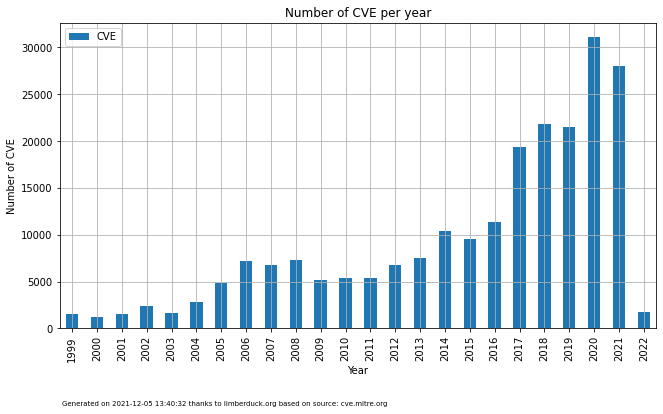

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

df = pd.read_csv(csv_filename)

df.plot(x='year', 
        xlabel='Year',
        y='number', 
        ylabel='Number of CVE',
        kind='bar', 
        title='Number of CVE per year')
plt.tight_layout()
plt.legend(['CVE'])
plt.figtext(0.15, 0.02, f"Generated on {datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')} thanks to limberduck.org based on source: cve.mitre.org", ha="left", fontsize=7)
fig = plt.gcf()
fig.set_size_inches(10,6)
fig.patch.set_facecolor('white')
plt.grid(True)
plt.savefig('cve-number-of-entries-bg-white.png', dpi = 300, facecolor = 'white')
plt.savefig('cve-number-of-entries-bg-transparent.png', dpi = 300, transparent = True)